# Building a Google Lens Web Application for Landmark Detection
## Bhavesh Bhatt

My YouTube channel, https://www.youtube.com/BhaveshBhatt8791

# Installation

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import gradio as gr
import PIL.Image as Image
import tensorflow as tf
import tensorflow_hub as hub

**Load the model**

In [11]:
TF_MODEL_URL = 'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1'
LABEL_MAP_URL = 'https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv'
IMAGE_SHAPE = (321, 321)

In [12]:
classifier = tf.keras.Sequential([hub.KerasLayer(TF_MODEL_URL,
                                                 input_shape=IMAGE_SHAPE+(3,),
                                                 output_key="predictions:logits")])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [13]:
df = pd.read_csv(LABEL_MAP_URL)

In [14]:
label_map = dict(zip(df.id, df.name))

In [24]:
img_loc = "../data/leaning-tower.jpeg"

In [25]:
img = Image.open(img_loc).resize(IMAGE_SHAPE)

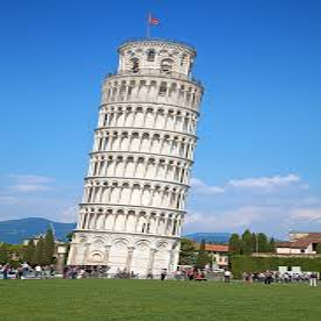

In [26]:
img

In [27]:
img = np.array(img)/255.0
img.shape

(321, 321, 3)

In [28]:
img = img[np.newaxis, ...]

In [29]:
img.shape

(1, 321, 321, 3)

In [30]:
result = classifier.predict(img)

1/1 [==============================] - 0s 84ms/step


In [31]:
result

array([[-0.16593677,  0.21581155,  0.17810327, ...,  0.03032542,
        -0.15848069,  0.20604306]], dtype=float32)

In [33]:
label_map[np.argmax(result)]

'Goldin Finance 117'

**Define prediction Function**

In [34]:
class_names=list(label_map.values())

In [36]:
def classify_image(image):
    img = np.array(image)/255.0
    img = img[np.newaxis, ...]
    prediction = classifier.predict(img)
    return label_map[np.argmax(prediction)]

**Build a shareable UI in 3 lines of code!**

In [ ]:
image = gr.inputs.Image(shape=(321, 321))
label = gr.outputs.Label(num_top_classes=1)

gr.Interface(
    classify_image, 
    image, 
    label,
    capture_session=True).launch(debug=True);

D:\ml2\ml2\lib\site-packages\gradio\inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
D:\ml2\ml2\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
D:\ml2\ml2\lib\site-packages\gradio\outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
D:\ml2\ml2\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
D:\ml2\ml2\lib\site-packages\gradio\deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 79ms/step
